In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('beer-servings.csv')

In [3]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [4]:
data=data.drop(columns=['Unnamed: 0','country','continent'])

In [5]:
X=data.drop(columns=['total_litres_of_pure_alcohol'])
y=data['total_litres_of_pure_alcohol']
X=X.fillna(X.mean())
y=y.fillna(y.mean())

In [6]:
X.isna().sum()
y.isna().sum()

np.int64(0)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.regularizers import L1L2,L1,L2

In [ ]:
model =Sequential([
    Input(shape=(3,)),
    Dense(10,activation='relu',kernel_regularizer=L1L2(l1=1e-6,l2=1e-4),bias_regularizer=L2(l2=1e-5),activity_regularizer=L2(1e-5)),
    Dense(10,activation='relu',kernel_regularizer=L2(l2=1e-5)),
    Dense(10,activation='relu'),   
    Dense(1)
])

In [19]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['r2_score']

)

In [20]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 121.5632 - r2_score: -9.0919 - val_loss: 106.4112 - val_r2_score: -4.9064
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 68.9652 - r2_score: -4.7254 - val_loss: 63.0413 - val_r2_score: -2.4992
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.0216 - r2_score: -2.3225 - val_loss: 44.5339 - val_r2_score: -1.4719
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.6510 - r2_score: -1.3786 - val_loss: 36.4843 - val_r2_score: -1.0251
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.6157 - r2_score: -0.9605 - val_loss: 30.3297 - val_r2_score: -0.6835
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.7174 - r2_score: -0.7199 - val_loss: 23.6515 - val_r2_score: -0.3128
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.6530 - r2_score: -0.4655 - val_loss: 20.5921 - val_r2_score: -0.1430
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.6967 - r2_score: -0.3031 - 

In [13]:
model.save('beer_regression.keras')

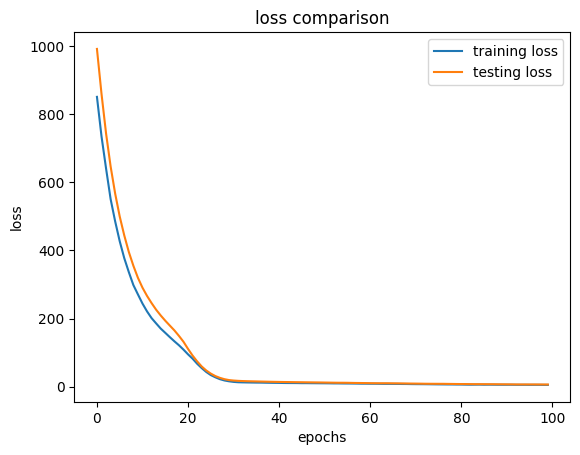

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss comparison')
plt.legend()
plt.show()

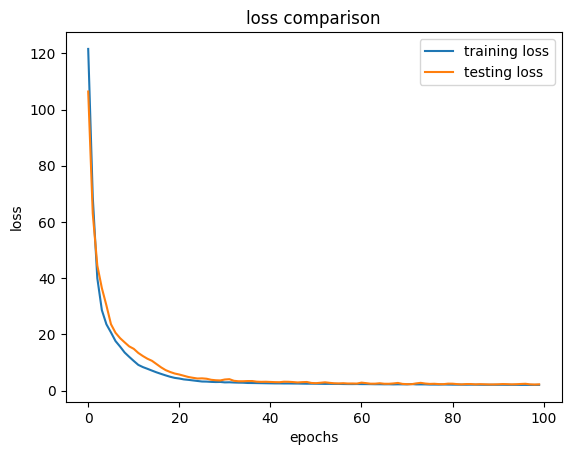

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss comparison')
plt.legend()
plt.show()

In [73]:
import numpy as np
model.predict(np.array([[1,2,3]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.14214471]], dtype=float32)

In [74]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.7076 - r2_score: 0.7387


[4.707590103149414, 0.738701581954956]